In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm
import plotly.graph_objects as go

In [130]:
class NeuralNetwork_EP:
	def __init__(self, layers, alpha=0.1):
		w=0
		# initialize the list of weights matrices, then store the
		# network architecture and learning rate
		self.W = []
		self.layers = layers
		self.alpha = alpha
		self.loss_curve = []
		# start looping from the index of the first layer but
		# stop before we reach the last two layers
		for i in np.arange(0, len(layers) - 2):
			# randomly initialize a weight matrix connecting the
			# number of nodes in each respective layer together,
			# adding an extra node for the bias
			w = np.random.randn(layers[i] + 1, layers[i + 1] + 1)
			self.W.append(w / np.sqrt(layers[i]))
		# the last two layers are a special case where the input
		# connections need a bias term but the output does not
		w = np.random.randn(layers[-2] + 1, layers[-1])
		self.W.append(w / np.sqrt(layers[-2]))        
	def __repr__(self):
		# construct and return a string that represents the network
		# architecture
		return "NeuralNetwork: {}".format("-".join(str(l) for l in self.layers))
	def sigmoid(self, x):
		# compute and return the sigmoid activation value for a
		# given input value
		return 1.0 / (1 + np.exp(-x))

	def sigmoid_deriv(self, x):
		# compute the derivative of the sigmoid function ASSUMING
		# that x has already been passed through the 'sigmoid'
		# function
		return x * (1 - x)

	def fit(self, X, y, epochs=1000, displayUpdate=100):
		# insert a column of 1's as the last entry in the feature
		# matrix -- this little trick allows us to treat the bias
		# as a trainable parameter within the weight matrix
		X = np.c_[X, np.ones((X.shape[0]))]

		# loop over the desired number of epochs
		for epoch in np.arange(0, epochs):
			# loop over each individual data point and train
			# our network on it
			for (x, target) in zip(X, y):
				self.fit_partial(x, target)

			# check to see if we should display a training update
			if epoch == 0 or (epoch + 1) % displayUpdate == 0:
				loss = self.calculate_loss(X, y)
				self.loss_curve.append(loss)
				# print("[INFO] epoch={}, loss={:.7f}".format(epoch + 1, loss))
    
	def fit_partial(self, x, y):
		# construct our list of output activations for each layer
		# as our data point flows through the network; the first
		# activation is a special case -- it's just the input
		# feature vector itself
		A = [np.atleast_2d(x)]
		# FEEDFORWARD:
		# loop over the layers in the network
		for layer in np.arange(0, len(self.W)):
			# feedforward the activation at the current layer by
			# taking the dot product between the activation and
			# the weight matrix -- this is called the "net input"
			# to the current layer
			net = A[layer].dot(self.W[layer])

			# computing the "net output" is simply applying our
			# nonlinear activation function to the net input
			out = self.sigmoid(net)

			# once we have the net output, add it to our list of
			# activations
			A.append(out)
		# BACKPROPAGATION
		# the first phase of backpropagation is to compute the
		# difference between our *prediction* (the final output
		# activation in the activations list) and the true target
		# value
		error = A[-1] - y

		# from here, we need to apply the chain rule and build our
		# list of deltas 'D'; the first entry in the deltas is
		# simply the error of the output layer times the derivative
		# of our activation function for the output value
		D = [error * self.sigmoid_deriv(A[-1])]
		# once you understand the chain rule it becomes super easy
		# to implement with a 'for' loop -- simply loop over the
		# layers in reverse order (ignoring the last two since we
		# already have taken them into account)
		for layer in np.arange(len(A) - 2, 0, -1):
			# the delta for the current layer is equal to the delta
			# of the *previous layer* dotted with the weight matrix
			# of the current layer, followed by multiplying the delta
			# by the derivative of the nonlinear activation function
			# for the activations of the current layer
			delta = D[-1].dot(self.W[layer].T)
			delta = delta * self.sigmoid_deriv(A[layer])
			D.append(delta)
  		# since we looped over our layers in reverse order we need to
		# reverse the deltas
		D = D[::-1]

		# WEIGHT UPDATE PHASE
		# loop over the layers
		for layer in np.arange(0, len(self.W)):
			# update our weights by taking the dot product of the layer
			# activations with their respective deltas, then multiplying
			# this value by some small learning rate and adding to our
			# weight matrix -- this is where the actual "learning" takes
			# place
			self.W[layer] += -self.alpha * A[layer].T.dot(D[layer])

	def predict(self, X, addBias=True):
		# initialize the output prediction as the input features -- this
		# value will be (forward) propagated through the network to
		# obtain the final prediction
		p = np.atleast_2d(X)

		# check to see if the bias column should be added
		if addBias:
			# insert a column of 1's as the last entry in the feature
			# matrix (bias)
			p = np.c_[p, np.ones((p.shape[0]))]

		# loop over our layers in the network
		for layer in np.arange(0, len(self.W)):
			# computing the output prediction is as simple as taking
			# the dot product between the current activation value 'p'
			# and the weight matrix associated with the current layer,
			# then passing this value through a nonlinear activation
			# function
			p = self.sigmoid(np.dot(p, self.W[layer]))

		# return the predicted value
		return p>=0.5

	def calculate_loss(self, X, targets):
		# make predictions for the input data points then compute
		# the loss
		targets = np.atleast_2d(targets)
		predictions = self.predict(X, addBias=False)
		loss = 0.5 * np.sum((predictions - targets) ** 2)

		# return the loss
		return loss

In [41]:
# construct the XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
nn = NeuralNetwork_EP([2, 4, 1], alpha=0.5)
nn.fit(X, y, epochs=10000)
print(nn)

NeuralNetwork: 2-4-1


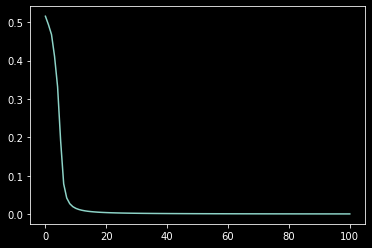

In [42]:
plt.plot(nn.loss_curve)

# Test with previous data

dimension de X:  (1000, 2) -0.8072358426845737 2.6694629546280844
dimension de y:  (1000,)


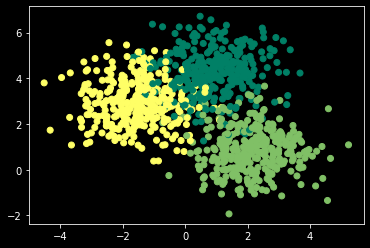

In [135]:
# X,y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=0)
X,y = make_blobs(n_samples=1000, centers=3, n_features=2 ,random_state=0)
# X= X.T
# y = y.reshape((1,y.shape[0]))

print('dimension de X: ', X.shape, X[0].min(), X[0].max())
print('dimension de y: ',y.shape)

plt.scatter(X[:,0],X[:,1],c=y,cmap='summer')

NeuralNetwork: 2-8-8-8-1


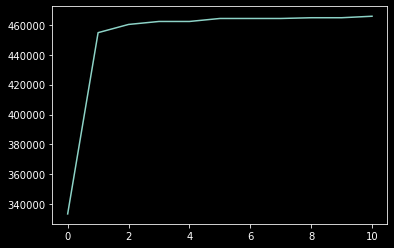

In [140]:
nn_1 = NeuralNetwork_EP([2, 8,8,8 ,1], alpha=0.05)
nn_1.fit(X, y, epochs=1000)
print(nn_1)
plt.plot(nn_1.loss_curve)

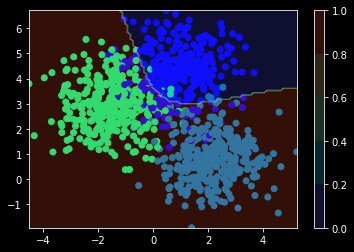

In [141]:
h = 100
# W1 = np.linspace(X[0].min(),X[0].max(),h)
# W2 = np.linspace(X[1].min(),X[1].max(),h)
W1 = np.linspace(X[:,0].min(),X[:,0].max(),h)
W2 = np.linspace(X[:,1].min(),X[:,1].max(),h)
W11, W22 = np.meshgrid(W1,W2)

W_Final = np.c_[W11.ravel(),W22.ravel()]

Z = (nn_1.predict(W_Final)+0).reshape(W11.shape)

# plt.contourf(W11,W22,E,20, cmap='magma')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter')
plt.contourf(W11,W22,Z,4, cmap='rainbow',alpha=0.2)
plt.colorbar()

In [108]:
print(X[:,1].max())

7.063142441469973


In [142]:
print(Z,y)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]] [2 0 2 2 2 1 0 0 1 0 1 2 2 0 0 1 2 1 0 0 2 1 2 0 0 0 0 0 1 1 2 2 2 0 2 1 1
 2 1 1 1 1 0 1 1 1 1 2 0 1 0 0 1 0 0 1 1 2 2 1 2 2 2 2 0 0 1 1 2 2 0 0 0 2
 0 2 1 0 2 2 2 0 0 0 0 0 0 1 0 1 0 1 1 2 1 2 0 1 0 2 0 2 2 1 0 0 2 0 1 1 0
 0 0 0 2 2 0 2 0 1 0 1 2 0 0 1 2 2 2 0 0 2 0 0 2 0 0 1 2 2 0 0 0 2 2 2 0 0
 2 0 0 2 0 0 0 2 0 1 1 2 0 0 0 0 0 0 2 0 1 1 1 2 2 2 2 0 1 0 0 2 0 0 0 1 1
 0 2 1 2 0 1 2 1 2 2 0 0 2 1 1 0 2 1 0 0 2 2 2 1 0 2 0 0 0 1 2 0 2 0 0 2 0
 2 2 0 1 0 0 0 2 2 1 2 1 0 1 0 1 2 2 2 2 2 2 0 2 2 0 1 1 1 1 2 2 1 0 1 0 2
 1 0 1 1 1 0 1 2 2 2 0 2 1 2 2 2 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 0 2 1 1 1 0
 0 1 0 1 1 1 1 2 0 0 1 0 0 0 2 0 2 0 2 1 0 1 0 1 0 1 2 0 1 2 1 2 0 1 1 2 2
 2 0 2 0 2 0 1 0 1 1 2 1 1 0 1 0 1 0 0 2 2 1 2 0 0 0 0 1 2 1 1 2 2 0 2 0 1
 1 1 1 0 2 1 2 0 2 2 0 2 2 1 1 2 2 1 2 1 2 2 1 0 0 2 1 2 1 1 1 0 0 0 1 2 0
 1 1 2 0 0 2 0 2 0 1 1 1 2 0 2 1 0 0 1 2 1 1 2 0 2 0 2 

In [154]:
from math import cos, sin, atan

In [168]:
class Neuron():
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius):
        circle = pyplot.Circle((self.x, self.y), radius=neuron_radius, fill=False)
        pyplot.gca().add_patch(circle)


class Layer():
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 6
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in range(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return self.horizontal_distance_between_neurons * (self.number_of_neurons_in_widest_layer - number_of_neurons) / 2

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)
        line = pyplot.Line2D((neuron1.x - x_adjustment, neuron2.x + x_adjustment), (neuron1.y - y_adjustment, neuron2.y + y_adjustment))
        pyplot.gca().add_line(line)

    def draw(self, layerType=0):
        for neuron in self.neurons:
            neuron.draw( self.neuron_radius )
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)
        # write Text
        x_text = self.number_of_neurons_in_widest_layer * self.horizontal_distance_between_neurons
        if layerType == 0:
            pyplot.text(x_text, self.y, 'Input Layer', fontsize = 12)
        elif layerType == -1:
            pyplot.text(x_text, self.y, 'Output Layer', fontsize = 12)
        else:
            pyplot.text(x_text, self.y, 'Hidden Layer '+str(layerType), fontsize = 12)

class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons ):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self):
        pyplot.figure(figsize=(24,18))
        for i in range( len(self.layers) ):
            layer = self.layers[i]
            if i == len(self.layers)-1:
                i = -1
            layer.draw( i )
        pyplot.axis('scaled')
        pyplot.axis('off')
        pyplot.title( 'Neural Network architecture', fontsize=15 )
        pyplot.show()

class DrawNN():
    def __init__( self, neural_network ):
        self.neural_network = neural_network

    def draw( self ):
        widest_layer = max( self.neural_network )
        network = NeuralNetwork( widest_layer )
        for l in self.neural_network:
            network.add_layer(l)
        network.draw()

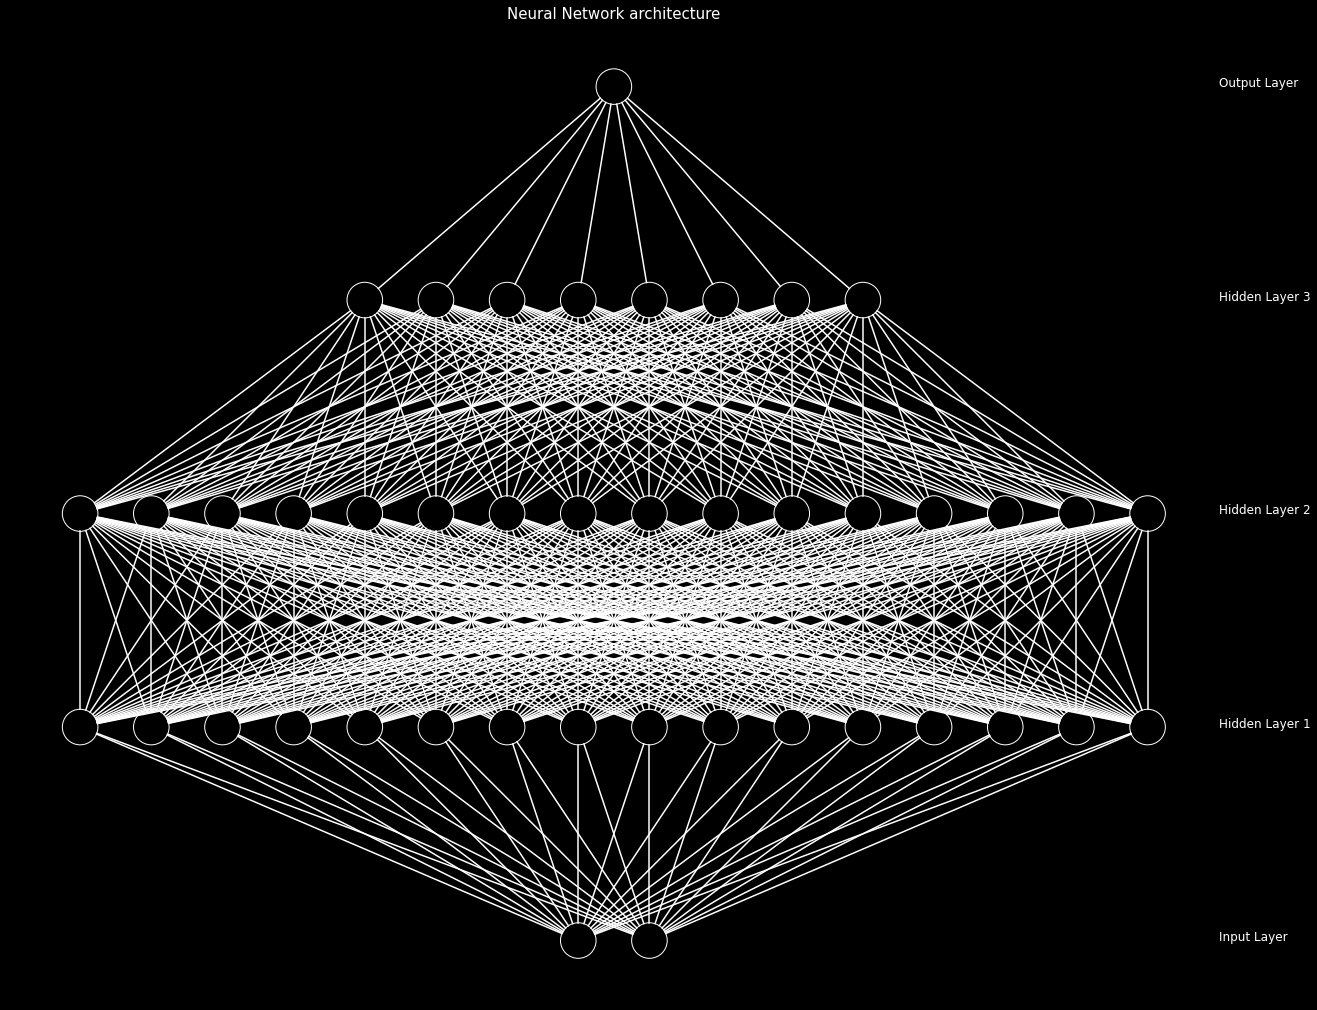

In [169]:
network = DrawNN([2,16,16,8,1])
network.draw()